<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.to_hourly()

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))
d.add_dimension(name="interface", function="X Y Z".split())
d.add_dimension(name="const",function=3)

In [4]:
d.data

,epoch,product,product_id,interface,const
2019-01-01 00:00:00,1546300800,A,7075,X,3
2019-01-01 01:00:00,1546304400,A,8270,Y,3
2019-01-01 02:00:00,1546308000,B,7665,Z,3
2019-01-01 03:00:00,1546311600,D,4847,X,3
2019-01-01 04:00:00,1546315200,B,9837,Y,3
...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,7346,Z,3
2019-01-11 21:00:00,1547240400,A,6544,X,3
2019-01-11 22:00:00,1547244000,A,7297,Y,3
2019-01-11 23:00:00,1547247600,D,899,Z,3


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

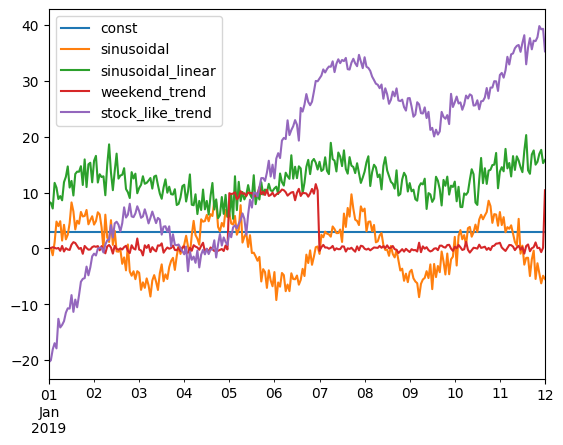

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,epoch,product,product_id,interface,const,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,A,7075,X,3,-0.079408,8.340754,0.085388,-20.327335
2019-01-01 01:00:00,1546304400,A,8270,Y,3,0.082249,8.152171,0.086439,-20.008302
2019-01-01 02:00:00,1546308000,B,7665,Z,3,-1.218273,7.142345,0.219860,-18.054452
2019-01-01 03:00:00,1546311600,D,4847,X,3,1.080635,11.732893,0.115439,-16.947837
2019-01-01 04:00:00,1546315200,B,9837,Y,3,4.807377,10.875262,-0.023065,-17.876945
...,...,...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,7346,Z,3,-2.649247,15.497076,0.067017,37.790883
2019-01-11 21:00:00,1547240400,A,6544,X,3,-4.473254,16.918873,0.112565,39.779698
2019-01-11 22:00:00,1547244000,A,7297,Y,3,-6.246422,17.638055,-0.656014,39.202088
2019-01-11 23:00:00,1547247600,D,899,Z,3,-4.880552,15.263337,0.132303,39.291438


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,A,X,3,8.340754,0.085388,-20.327335
2019-01-01 01:00:00,1546304400,A,Y,3,8.152171,0.086439,-20.008302
2019-01-01 02:00:00,1546308000,B,Z,3,7.142345,0.219860,-18.054452
2019-01-01 03:00:00,1546311600,D,X,3,11.732893,0.115439,-16.947837
2019-01-01 04:00:00,1546315200,B,Y,3,10.875262,-0.023065,-17.876945
...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,Z,3,15.497076,0.067017,37.790883
2019-01-11 21:00:00,1547240400,A,X,3,16.918873,0.112565,39.779698
2019-01-11 22:00:00,1547244000,A,Y,3,17.638055,-0.656014,39.202088
2019-01-11 23:00:00,1547247600,D,Z,3,15.263337,0.132303,39.291438


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,Y,3,15.102096,-0.371638,-19.588294
2019-01-01 01:00:00,1546304400,D,Z,3,8.998683,-0.220739,-19.366719
2019-01-01 02:00:00,1546308000,B,X,3,8.633991,-0.471809,-16.869504
2019-01-01 03:00:00,1546311600,D,Y,3,8.619342,-0.211594,-17.563289
2019-01-01 04:00:00,1546315200,B,Z,3,10.978934,0.528561,-17.592126
...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,D,Y,3,15.544187,0.298774,46.491308
2019-01-11 22:00:00,1547244000,C,Z,3,17.910245,-0.613451,46.149599
2019-01-11 23:00:00,1547247600,A,X,3,17.216993,-0.305244,44.660498
2019-01-12 00:00:00,1547251200,A,Y,3,16.215092,10.456753,45.923052


### Adding multi dimension/metric
In case you want to add a dimensions or metrics that are linked

In [10]:
import random
def my_custom_function():
    while True:
        val1 = random.randint(1,100)
        val2 =  random.randint(1,100)
        val3 = val1 + val2
        yield (val1, val2, val3)

d.add_multi_items(names="val1 val2 val3".split(), function=my_custom_function())

    

In [11]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3
2019-01-01 00:00:00,1546300800,C,Y,3,15.102096,-0.371638,-19.588294,80,95,175
2019-01-01 01:00:00,1546304400,D,Z,3,8.998683,-0.220739,-19.366719,60,53,113
2019-01-01 02:00:00,1546308000,B,X,3,8.633991,-0.471809,-16.869504,56,86,142
2019-01-01 03:00:00,1546311600,D,Y,3,8.619342,-0.211594,-17.563289,98,68,166
2019-01-01 04:00:00,1546315200,B,Z,3,10.978934,0.528561,-17.592126,11,70,81
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,D,Y,3,15.544187,0.298774,46.491308,6,9,15
2019-01-11 22:00:00,1547244000,C,Z,3,17.910245,-0.613451,46.149599,26,93,119
2019-01-11 23:00:00,1547247600,A,X,3,17.216993,-0.305244,44.660498,23,28,51
2019-01-12 00:00:00,1547251200,A,Y,3,16.215092,10.456753,45.923052,44,12,56


In [12]:
d.add_multi_items(names="val4 val5 val6".split(), function=my_custom_function())

In [13]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3,val4,val5,val6
2019-01-01 00:00:00,1546300800,C,Y,3,15.102096,-0.371638,-19.588294,80,95,175,4,68,72
2019-01-01 01:00:00,1546304400,D,Z,3,8.998683,-0.220739,-19.366719,60,53,113,23,84,107
2019-01-01 02:00:00,1546308000,B,X,3,8.633991,-0.471809,-16.869504,56,86,142,41,56,97
2019-01-01 03:00:00,1546311600,D,Y,3,8.619342,-0.211594,-17.563289,98,68,166,81,47,128
2019-01-01 04:00:00,1546315200,B,Z,3,10.978934,0.528561,-17.592126,11,70,81,48,13,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,D,Y,3,15.544187,0.298774,46.491308,6,9,15,31,43,74
2019-01-11 22:00:00,1547244000,C,Z,3,17.910245,-0.613451,46.149599,26,93,119,61,84,145
2019-01-11 23:00:00,1547247600,A,X,3,17.216993,-0.305244,44.660498,23,28,51,75,43,118
2019-01-12 00:00:00,1547251200,A,Y,3,16.215092,10.456753,45.923052,44,12,56,88,35,123


In [14]:
d.remove_multi_item(["val1"])
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val4,val5,val6
2019-01-01 00:00:00,1546300800,C,Y,3,15.102096,-0.371638,-19.588294,4,68,72
2019-01-01 01:00:00,1546304400,D,Z,3,8.998683,-0.220739,-19.366719,23,84,107
2019-01-01 02:00:00,1546308000,B,X,3,8.633991,-0.471809,-16.869504,41,56,97
2019-01-01 03:00:00,1546311600,D,Y,3,8.619342,-0.211594,-17.563289,81,47,128
2019-01-01 04:00:00,1546315200,B,Z,3,10.978934,0.528561,-17.592126,48,13,61
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,D,Y,3,15.544187,0.298774,46.491308,31,43,74
2019-01-11 22:00:00,1547244000,C,Z,3,17.910245,-0.613451,46.149599,61,84,145
2019-01-11 23:00:00,1547247600,A,X,3,17.216993,-0.305244,44.660498,75,43,118
2019-01-12 00:00:00,1547251200,A,Y,3,16.215092,10.456753,45.923052,88,35,123


In [15]:
d

DataGen Class
  dimensions    = [
                    {"name": "product", "function": "<generator object random_choice"}
                    {"name": "interface", "function": "<itertools.cycle object"}
                    {"name": "const", "function": "<generator object constant"}
                  ]
  metrics       = [
                    {"name": "sinusoidal_linear", "trends": ["sine", "linear"]}
                    {"name": "weekend_trend", "trends": ["weekend"]}
                    {"name": "stock_like_trend", "trends": ["stock", "Linear"]}
                  ]
  multi_items   = [
                    {"names": ["val4", "val5", "val6"], "function": "<generator object my_custom_function"}
                  ]
  start         = 2019-01-01
  end           = 2019-01-12 01:05:00
  granularity   = HOURLY